In [0]:
import numpy as np

In [0]:
class PCA:
  def __init__(self, n_components):
    self.n_components = n_components
    self.components = None
    self.mean = None

  def fit(self, X):
    #mean
    self.mean = np.mean(X, axis=0)
    #1 row = sample, columns = features
    X = X - self.mean

    #covariance
    #but in documentation 1row = features, columns=samples for cov ...so we transpose our data
    cov = np.cov(X.T)

    #eigenvectors, eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(cov)

    #v[:, i]
    #sort eigenvectors
    eigenvectors = eigenvectors.T
    idxs = np.argsort(eigenvalues)[::-1]
    
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]

    #store first n eigenvectors
    self.components = eigenvectors[0:self.n_components]

  def transform(self, X):
    #project data
    X = X - self.mean
    return(np.dot(X, self.components.T))

PCA TEST

In [0]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [0]:
data = datasets.load_iris()
X = data.data
y = data.target

In [0]:
#project data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

In [0]:
print('Shape of X: ',X.shape)
print('Shape of transormed X: ', X_projected.shape)

Shape of X:  (150, 4)
Shape of transormed X:  (150, 2)


In [0]:
x1 = X_projected[:,0]
x2 = X_projected[:,1]

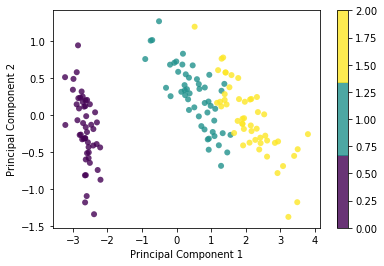

In [0]:
plt.scatter(x1,x2,c=y,edgecolor='none',alpha=0.8,cmap=plt.cm.get_cmap('viridis',3))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()